In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/dewang.moghe/Downloads/bank_transactions.csv')

In [3]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
df.shape

(1048567, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

1. Change the datatype of CustomeDOB and TransactionDate.

2. Impute the missing values in CustGender, Custlocation, and CustAccountBalance. we also drop the missing values in customerDOB.

For same customer id we have different values of gender. so we drop them.

# Dropping the Duplicates

In [7]:
df = df.drop_duplicates(subset =['CustomerID']).reset_index()
df.shape

(884265, 10)

Some of the values in the CustomerDOB column is 1/1/1800. It means they have temporarily filled the null values with this values. we plan to calculate the age of the customer by subtracting the transactionDate and CustomerDOB. hence CustomerDOB is important so we drop the these values as well.

In [8]:
# Removing the rows which contains CustomerDOB as values 1/1/1800.
df = df[df['CustomerDOB'] != '1/1/1800']

# Missing Value Imputation

Now we try to fill the missing values in **CustAccountBalance** column.
We try to fill the missing values using Mean, Median, and Radom value respectively.

### **Filling Missing Values using Median**

In [9]:
# Computing median of the CustAccountBalance column
df['CustAccountBalance'].median()

16041.81

In [10]:
# Filling the missing value with Median value
median = df['CustAccountBalance'].fillna(df['CustAccountBalance'].median())

<Axes: xlabel='CustAccountBalance', ylabel='Density'>

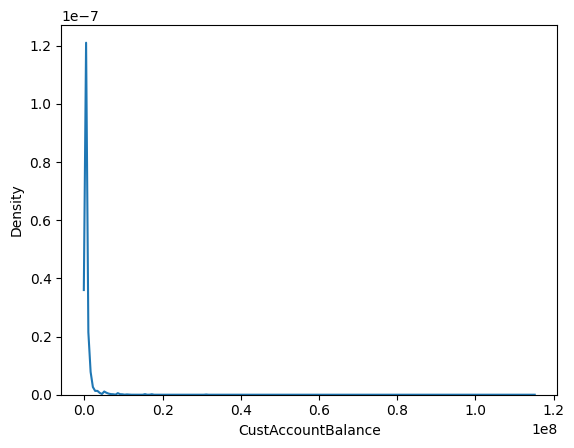

In [11]:
# Check Distribution after imputing with median
sns.kdeplot(median)

In [12]:
# Computing the median of the newly created array
median.median()

16041.81

In [13]:
# Computing the mean of the newly created array
median.mean()

105592.44293162528

In [14]:
median.skew()

65.74808511989049

### **Filling Missing Values using Mean**


In [15]:
# Computing the mean of the CustAccountBalance
df['CustAccountBalance'].mean()

105792.37444080476

In [16]:
# Filling the Missing value in the column using the mean value
mean = df['CustAccountBalance'].fillna(df['CustAccountBalance'].mean())

In [17]:
# Checking Distribution after filling the missing value
mean.median()

16123.43

In [18]:
mean.skew()

65.75016994374343

<Axes: xlabel='CustAccountBalance', ylabel='Density'>

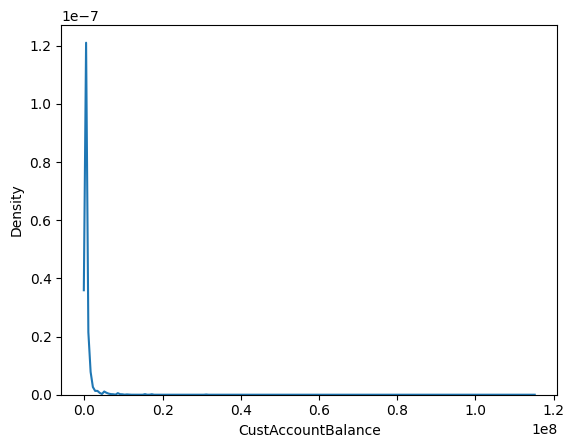

In [19]:
sns.kdeplot(mean)

### **Filling Missing Values using Random values in the column**

In [20]:
sorted_array = np.array(sorted(df['CustAccountBalance'].unique()))

In [21]:
import random
a = df['CustAccountBalance'].fillna(random.choice(sorted_array))

In [22]:
a.mean()

106266.27036539435

In [23]:
a.median()

16123.43

In [24]:
a.skew()

65.73244250167068

**We fill the missing values with median value.**




In [25]:
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(df['CustAccountBalance'].median())

Now, let us fill the missing values in **gender** column

<Axes: ylabel='count'>

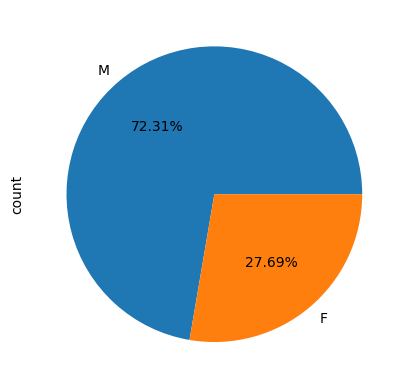

In [26]:
df['CustGender'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

In [27]:
# we can fill the missing values using the mode
mode = df['CustGender'].mode()

In [28]:
df['CustGender'] = df['CustGender'].fillna(df['CustGender'].value_counts().index[0])

<Axes: ylabel='count'>

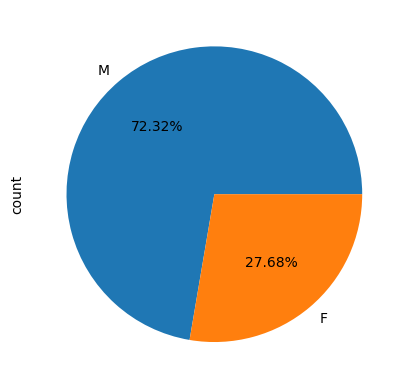

In [29]:
df['CustGender'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

In [30]:
# Distribution is same hence we can move forward with this

 ### Custlocation column

<Axes: xlabel='CustLocation'>

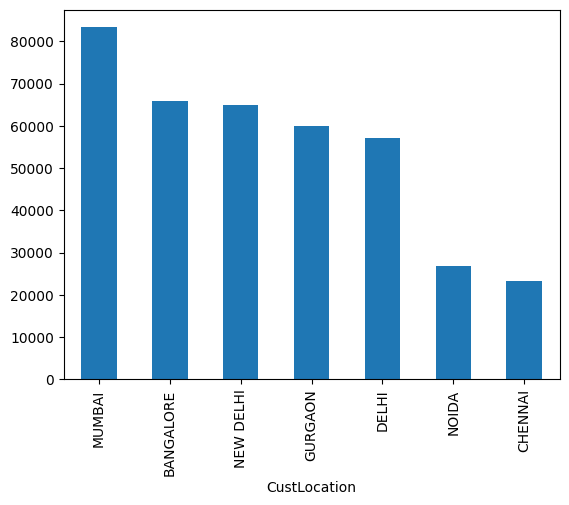

In [31]:
df['CustLocation'].value_counts().head(7).plot(kind = 'bar')

In [32]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                          83283
BANGALORE                       65792
NEW DELHI                       64860
GURGAON                         59876
DELHI                           57234
                                ...  
KOCHI 12                            1
DOMBIVALI E TILAKNAGAR THANE        1
WATERLOO                            1
MANIGACHHI                          1
KARANJIA                            1
Name: count, Length: 7951, dtype: int64

The following categories are same but have different names.

1. New Delhi | NewDelhi | Delhi

2. Navi Mumbai | NaviMumbai



last word to be removed

 if the last word is north, south, east, west removed it


In [33]:
last_word = ['WEST','NORTH',"EAST",'SOUTH']

In [34]:
dic = {'NEWDELHI':'DELHI','NEW DELHI':'DELHI'}

In [35]:
df['CustLocation']

0            JAMSHEDPUR
1               JHAJJAR
2                MUMBAI
3                MUMBAI
4           NAVI MUMBAI
              ...      
884260             PUNE
884261        BANGALORE
884262        NEW DELHI
884263           NASHIK
884264    VISAKHAPATNAM
Name: CustLocation, Length: 835864, dtype: object

In [36]:
for index,row in df.iterrows():
  if str(row['CustLocation']).split(' ')[-1] in last_word:
    df.at[index, 'CustLocation'] = (' ').join(row['CustLocation'].split(' ')[0:-1])

In [37]:
df['CustLocation']

0            JAMSHEDPUR
1               JHAJJAR
2                MUMBAI
3                MUMBAI
4           NAVI MUMBAI
              ...      
884260             PUNE
884261        BANGALORE
884262        NEW DELHI
884263           NASHIK
884264    VISAKHAPATNAM
Name: CustLocation, Length: 835864, dtype: object

In [38]:
count = 0
for index,row in df.iterrows():
  if str(row['CustLocation']).split(' ')[-1] in last_word:
    print(row['CustLocation'].split(' ')[-1])
    count += 1
print(count)

0


In [39]:
df['CustLocation'] = df['CustLocation'].replace(dic)

In [40]:
df['CustLocation'] = df['CustLocation'].fillna(df['CustLocation'].value_counts().index[0])
# df['CustLocation'].value_counts().index[0]
# df['CustLocation'].value_counts()

In [41]:
df['CustLocation'] = df['CustLocation'].str.split(' ').str.slice(-1,).str.get(0)

In [42]:
df['CustLocation'].value_counts()

CustLocation
DELHI           123994
MUMBAI          106464
BANGALORE        71414
GURGAON          60311
NOIDA            29690
                 ...  
MEHENDRAGARH         1
BHUBANESWER          1
TANENGLONG           1
                     1
KARANJIA             1
Name: count, Length: 3509, dtype: int64

In [43]:
df['CustLocation'].str.split(' ').str.slice(-1).value_counts().head(10).sum()

496996

In [44]:
# We drop the rows where we have null values for CustomerDOB
df = df.dropna()

In [45]:
df.isna().sum()

index                      0
TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

# Changing the datatypes of CustomerDOB and TransactionDate

In [46]:
loc = pd.DataFrame(df['CustLocation'].value_counts())

In [47]:
df['CustomerDOB']

0          10/1/94
1           4/4/57
2         26/11/96
3          14/9/73
4          24/3/88
            ...   
884260     24/5/80
884261    19/11/92
884262      8/4/90
884263     20/2/92
884264     30/8/78
Name: CustomerDOB, Length: 833030, dtype: object

In [48]:
pd.to_datetime(df['CustomerDOB'],dayfirst = True)

C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\2947227177.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['CustomerDOB'],dayfirst = True)


0        1994-01-10
1        2057-04-04
2        1996-11-26
3        2073-09-14
4        1988-03-24
            ...    
884260   1980-05-24
884261   1992-11-19
884262   1990-04-08
884263   1992-02-20
884264   1978-08-30
Name: CustomerDOB, Length: 833030, dtype: datetime64[ns]

if you see the second index then it shows the date of 2057 where as in data the date is 1957. so we change it using a custom function

In [49]:
l = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']

In [50]:
# for index,rows in df[0:50000].iterrows():
#   if rows['CustomerDOB'].split('/')[2] in l:
#     # print(index, rows['CustomerDOB'].split('/')[2])
#     print(index, rows['CustomerDOB'].split('/')[0] + '/' + rows['CustomerDOB'].split('/')[1] + '/' + str(20) + rows['CustomerDOB'].split('/')[2])
#   else:
#     print(index, rows['CustomerDOB'].split('/')[0] + '/' + rows['CustomerDOB'].split('/')[1] + '/' + str(19) + rows['CustomerDOB'].split('/')[2])

In [51]:
for index,rows in df.iterrows():
  if rows['CustomerDOB'].split('/')[2] in l:
    # print(index, rows['CustomerDOB'].split('/')[2])
    df.at[index,'CustomerDOB'] =  rows['CustomerDOB'].split('/')[0] + '/' + rows['CustomerDOB'].split('/')[1] + '/' + str(20) + rows['CustomerDOB'].split('/')[2]
  else:
    df.at[index,'CustomerDOB'] =  rows['CustomerDOB'].split('/')[0] + '/' + rows['CustomerDOB'].split('/')[1] + '/' + str(19) + rows['CustomerDOB'].split('/')[2]

In [52]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'],dayfirst=True)

In [53]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],dayfirst=True)

C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\1518452022.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],dayfirst=True)


In [54]:
df

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...,...
884260,1048560,T1048561,C5028150,1980-05-24,M,PUNE,464.87,2016-09-18,184632,3000.0
884261,1048561,T1048562,C1034220,1992-11-19,M,BANGALORE,1212.70,2016-09-18,184734,1500.0
884262,1048562,T1048563,C8020229,1990-04-08,M,DELHI,7635.19,2016-09-18,184824,799.0
884263,1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0


In [55]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [56]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [57]:
df['Birthyear'] = df['CustomerDOB'].dt.year

In the data there are dates where birthyear is above 2016 -2029. we drop the rows where birthyear is more than 2002.

In [58]:
df = df[df['Birthyear'] < 2002]

In [59]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year + (df['TransactionDate'].dt.month - df['CustomerDOB'].dt.month)/12

C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\2021626097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year + (df['TransactionDate'].dt.month - df['CustomerDOB'].dt.month)/12


In [60]:
df

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birthyear,Age
0,0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,1994,22.583333
1,1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,1957,59.333333
2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,1996,19.750000
3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,1973,42.916667
4,4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,1988,28.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
884260,1048560,T1048561,C5028150,1980-05-24,M,PUNE,464.87,2016-09-18,184632,3000.0,1980,36.333333
884261,1048561,T1048562,C1034220,1992-11-19,M,BANGALORE,1212.70,2016-09-18,184734,1500.0,1992,23.833333
884262,1048562,T1048563,C8020229,1990-04-08,M,DELHI,7635.19,2016-09-18,184824,799.0,1990,26.416667
884263,1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,1992,24.583333


# EDA

<Axes: ylabel='CustAccountBalance'>

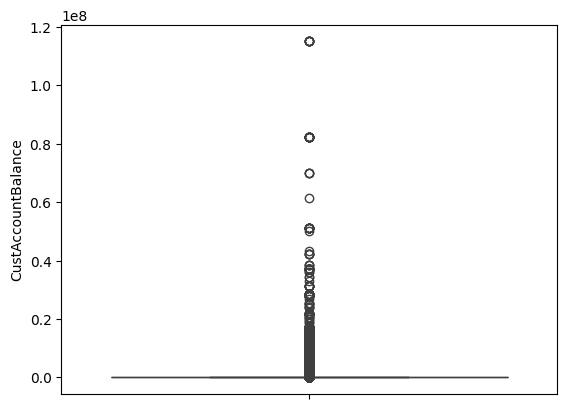

In [61]:
sns.boxplot(df['CustAccountBalance'])

<Axes: xlabel='CustAccountBalance', ylabel='Density'>

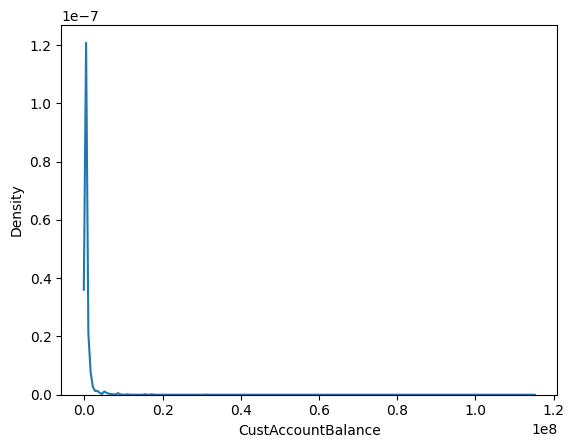

In [62]:
sns.kdeplot(df['CustAccountBalance'])

In [63]:
df[df['CustAccountBalance']> 10000000]

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birthyear,Age
4082,4087,T4088,C1640352,1963-06-16,M,DHABI,10576939.93,2016-09-22,135502,507.00,1963,53.250000
4172,4177,T4178,C6935220,1986-02-12,F,LUCKNOW,12343905.63,2016-09-22,102931,30000.00,1986,30.583333
5250,5257,T5258,C5695878,1947-02-15,M,DELHI,15674264.42,2016-09-22,100629,3907.44,1947,69.583333
5451,5458,T5459,C3715141,1985-03-25,M,DUBAI,21696661.00,2016-08-14,130449,2060.00,1985,31.416667
5864,5871,T5872,C6230669,1971-10-28,F,DELHI,31128912.59,2016-09-22,82055,3000.00,1971,44.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
879924,1042495,T1042496,C1818589,1945-12-10,M,DHABI,11473090.36,2016-09-18,122920,1800.00,1945,70.750000
882283,1045797,T1045798,C6718568,1945-12-10,M,DHABI,11473090.36,2016-09-18,111146,1485.00,1945,70.750000
882286,1045802,T1045803,C5095813,1947-02-15,M,DELHI,15674264.42,2016-09-18,92139,2193.23,1947,69.583333
882348,1045889,T1045890,C1754828,1983-03-31,M,GUWAHATI,15436498.08,2016-09-18,115317,18000.00,1983,33.500000


In [64]:
df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending = False).head(50).sum()

959014155.6999999

<Axes: xlabel='CustLocation'>

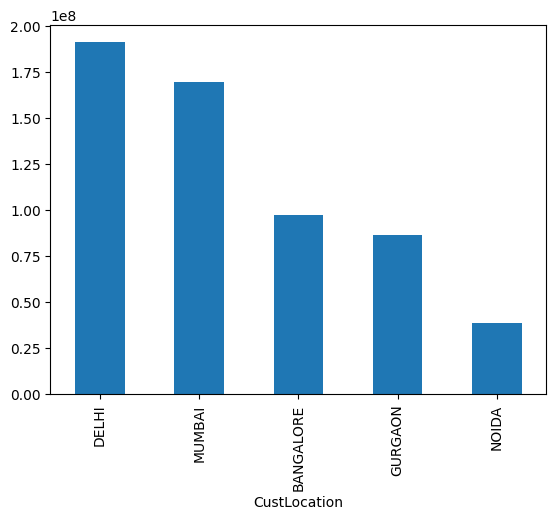

In [65]:
df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')

In [66]:
((df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending = False).head(5))/(df['TransactionAmount (INR)'].sum()))*100

CustLocation
DELHI        15.756818
MUMBAI       13.997316
BANGALORE     8.026313
GURGAON       7.133568
NOIDA         3.207494
Name: TransactionAmount (INR), dtype: float64

Top 5 citites by transaction amount has spent almost total of 45% of the transaction.

In [67]:
df.groupby('CustLocation')['CustomerID'].count().sort_values(ascending = False).head(5)

CustLocation
DELHI        123105
MUMBAI       105755
BANGALORE     71259
GURGAON       60157
NOIDA         29614
Name: CustomerID, dtype: int64

In [68]:
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending = False).head(5)

CustLocation
ROOMFORD      117621.000000
MUNCHEN       112592.857143
KEYNES        103579.000000
NAPERVILLE     87658.750000
ELIZABETH      64700.000000
Name: TransactionAmount (INR), dtype: float64

In [69]:
df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending = False).head(5) / df.groupby('CustLocation')['CustomerID'].count().sort_values(ascending = False).head(5)

CustLocation
DELHI        1551.477125
MUMBAI       1604.339979
BANGALORE    1365.302642
GURGAON      1437.385286
NOIDA        1312.868793
dtype: float64

In [70]:
df.groupby('CustGender')['TransactionAmount (INR)'].sum()

CustGender
F    3.673476e+08
M    8.447917e+08
Name: TransactionAmount (INR), dtype: float64

In [71]:
df.groupby('CustGender')['TransactionAmount (INR)'].count()

CustGender
F    230698
M    601706
Name: TransactionAmount (INR), dtype: int64

In [72]:
df.groupby('CustGender')['TransactionAmount (INR)'].sum() / df.groupby('CustGender')['TransactionAmount (INR)'].count()

CustGender
F    1592.331288
M    1403.994120
Name: TransactionAmount (INR), dtype: float64

In [73]:
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day

C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\1651825493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = df['TransactionDate'].dt.month
C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\1651825493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDay'] = df['TransactionDate'].dt.day


In [74]:
df['BirhtMonth'] = df['CustomerDOB'].dt.month
df['BirhtDay'] = df['CustomerDOB'].dt.day
df['BirhtYear'] = df['CustomerDOB'].dt.year

C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\346273962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BirhtMonth'] = df['CustomerDOB'].dt.month
C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\346273962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BirhtDay'] = df['CustomerDOB'].dt.day
C:\Users\dewang.moghe\AppData\Local\Temp\ipykernel_23436\346273962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [75]:
df.groupby('TransactionMonth')['TransactionAmount (INR)'].sum()

TransactionMonth
8     7.910555e+08
9     4.144699e+08
10    6.613939e+06
Name: TransactionAmount (INR), dtype: float64

In [76]:
df.groupby('TransactionDay')['TransactionAmount (INR)'].sum()

TransactionDay
1     47001976.80
2     51242308.26
3     61863596.84
4     61070529.56
5     52354454.93
6     60706725.15
7     56492532.89
8     46007868.52
9     48231595.77
10    50663394.73
11    52534888.09
12    47010047.02
13    54361156.54
14    54962539.46
15    52406255.07
16    23539013.65
17    23934622.25
18    37885094.68
19    19019822.24
20    24990380.22
21    32192123.45
22    31606239.92
23    22593497.65
24    20856047.86
25    30581019.02
26    34975405.93
27    34476132.30
28    22226591.83
29    16101163.49
30    20729160.26
31    19523145.05
Name: TransactionAmount (INR), dtype: float64

<Axes: xlabel='BirhtMonth', ylabel='BirhtDay'>

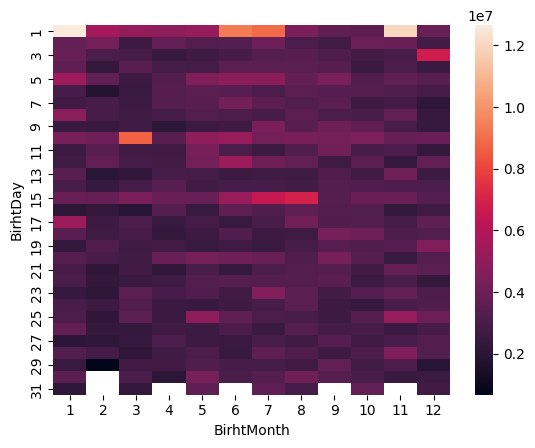

In [77]:
sns.heatmap(pd.crosstab(columns = df['BirhtMonth'],index = df['BirhtDay'],values = df['TransactionAmount (INR)'],aggfunc = 'sum'))

In [78]:
pd.crosstab(columns = df['BirhtMonth'],index = df['BirhtDay'],values = df['TransactionAmount (INR)'],aggfunc = 'sum',margins = True)

BirhtMonth,1,2,3,4,5,6,7,8,9,10,11,12,All
BirhtDay,,,,,,,,,,,,,
1,1.265710e+07,5506476.45,5133995.67,4969945.57,5.197560e+06,9.367277e+06,8.952920e+06,4.387280e+06,3.627686e+06,3538496.05,1.196228e+07,3863532.11,7.916455e+07
2,3.793668e+06,4209911.01,2574032.73,3719203.22,3.281952e+06,3.296441e+06,4.084876e+06,3.023526e+06,2.819479e+06,3973797.54,3.858112e+06,2779205.57,4.141420e+07
3,3.871239e+06,3020625.17,2839300.95,2398911.15,2.666003e+06,2.961103e+06,3.361431e+06,3.414176e+06,3.136708e+06,2788223.92,2.971886e+06,6806578.83,4.023619e+07
4,3.628071e+06,2296777.57,3402729.21,2882372.62,2.858394e+06,3.555478e+06,3.543013e+06,3.484581e+06,3.336423e+06,2493807.48,3.083175e+06,2520444.58,3.708527e+07
5,5.352424e+06,3678103.03,2626027.70,3256500.53,4.587439e+06,4.840986e+06,4.842442e+06,3.716760e+06,4.390019e+06,3167428.70,3.637315e+06,3371943.94,4.746739e+07
6,2.937888e+06,1808446.13,2512443.21,3375159.14,3.542121e+06,3.471924e+06,3.058042e+06,3.521855e+06,3.374067e+06,3341723.05,3.165960e+06,2957120.15,3.706675e+07
7,2.744541e+06,2951277.88,2584205.42,3359017.98,3.404223e+06,4.185486e+06,3.565347e+06,3.228820e+06,3.491566e+06,2644487.89,2.844382e+06,2161273.95,3.716463e+07
8,4.819116e+06,2934863.54,2674865.23,2908329.55,3.229749e+06,3.078279e+06,2.954883e+06,3.550043e+06,3.017825e+06,2986760.48,3.737103e+06,2410964.30,3.830278e+07
9,2.493791e+06,2479212.55,2720484.35,2092337.09,2.590226e+06,2.673223e+06,4.411098e+06,3.397250e+06,4.036992e+06,3712522.77,2.871798e+06,2446168.55,3.592510e+07


In [79]:
pd.crosstab(columns = df['BirhtMonth'],index = df['BirhtDay'],values = df['TransactionAmount (INR)'],aggfunc = 'mean',margins = True)

BirhtMonth,1,2,3,4,5,6,7,8,9,10,11,12,All
BirhtDay,,,,,,,,,,,,,
1,1401.517062,1754.772610,1416.274668,1583.289446,1527.795506,1702.522174,1439.607585,1340.446156,1531.315369,1393.108681,4904.584030,1516.895214,1676.362658
2,1319.536560,1383.019386,1170.014877,1389.317602,1369.762896,1327.604043,1345.922853,1293.210342,1222.670833,1476.699197,1913.746166,1341.315430,1374.380356
3,1580.742789,1429.543384,1281.851445,1280.785451,1115.949154,1143.724732,1279.083463,1400.400152,1372.138080,1524.452663,1607.293753,3333.290318,1506.973246
4,1369.083234,1212.019826,1600.531143,1319.767683,1401.860956,1397.044322,1597.390857,1454.332588,1557.620224,1180.221240,1381.350954,1068.890831,1378.736931
5,1793.107005,1462.466414,1300.013713,1129.161071,1372.252187,1455.497769,1368.307884,1286.521177,1611.607463,1251.948103,1485.831250,1409.675560,1412.930134
6,1288.547399,1029.280666,1290.417673,1629.724355,1686.724490,1271.766963,1213.990429,1373.042912,1477.262132,1409.415036,1530.928453,1516.471872,1391.290020
7,1256.658063,1295.556576,1074.960657,1560.156981,1294.873621,1728.825254,1257.618102,1416.770597,1499.169699,1144.799952,1337.903062,1084.976883,1330.158506
8,2373.948985,1547.923808,1438.873174,1469.595528,1439.282210,1312.139263,1162.882039,1239.107518,1289.118048,1322.160460,1741.427316,1174.933869,1442.231426
9,1238.227880,1371.245879,1527.503846,1241.006578,1317.510809,1326.003601,2010.527944,1367.652818,1528.006173,1676.839553,1364.922828,1471.822232,1462.093672


In [80]:
pd.crosstab(columns = df['TransactionMonth'],index = df['TransactionDay'],values = df['TransactionAmount (INR)'],aggfunc = 'sum',margins = True)

TransactionMonth,8,9,10,All
TransactionDay,,,,
1,2.550144e+07,2.150054e+07,NaN,4.700198e+07
2,2.604040e+07,2.520191e+07,NaN,5.124231e+07
3,2.658811e+07,3.527548e+07,NaN,6.186360e+07
4,2.935466e+07,3.171587e+07,NaN,6.107053e+07
5,2.933099e+07,2.302346e+07,NaN,5.235445e+07
6,4.093167e+07,1.977506e+07,NaN,6.070673e+07
7,3.718872e+07,1.930381e+07,NaN,5.649253e+07
8,2.379064e+07,2.221723e+07,NaN,4.600787e+07
9,2.690209e+07,2.132951e+07,NaN,4.823160e+07


In [81]:
top_10_cities = df[df['CustLocation'].isin(df['CustLocation'].value_counts(ascending = False).head(10).index.tolist())]

In [82]:
top_10_cities

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birthyear,Age,TransactionMonth,TransactionDay,BirhtMonth,BirhtDay,BirhtYear
2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,1996,19.750000,8,2,11,26,1996
3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,1973,42.916667,8,2,9,14,1973
4,4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,1988,28.416667,8,2,3,24,1988
6,6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,173806,566.0,1992,24.583333,8,2,1,26,1992
7,7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,170537,148.0,1982,34.583333,8,2,1,27,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,1048557,T1048558,C6912058,1983-12-24,F,KOLKATA,2751.87,2016-09-18,184320,615.0,1983,32.750000,9,18,12,24,1983
884259,1048559,T1048560,C2427315,1988-10-28,M,MUMBAI,7315.11,2016-09-18,184632,765.0,1988,27.916667,9,18,10,28,1988
884260,1048560,T1048561,C5028150,1980-05-24,M,PUNE,464.87,2016-09-18,184632,3000.0,1980,36.333333,9,18,5,24,1980
884261,1048561,T1048562,C1034220,1992-11-19,M,BANGALORE,1212.70,2016-09-18,184734,1500.0,1992,23.833333,9,18,11,19,1992


In [83]:
top_10_cities.groupby('CustLocation')['Age'].mean()

CustLocation
BANGALORE    31.146818
CHENNAI      32.832794
DELHI        31.463758
GURGAON      31.464371
HYDERABAD    31.319880
KOLKATA      34.766965
MUMBAI       31.937566
NOIDA        31.109976
PUNE         31.288135
THANE        31.618141
Name: Age, dtype: float64

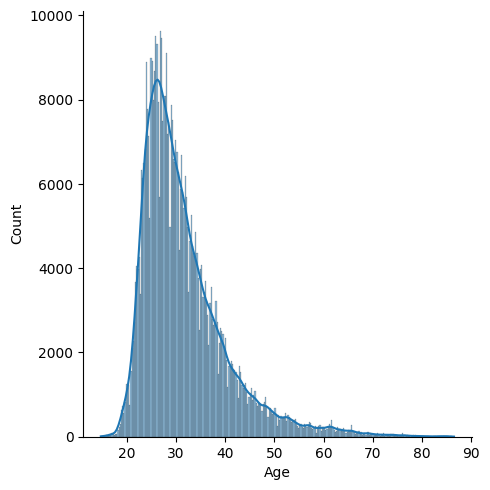

In [84]:
sns.displot(top_10_cities['Age'],kde = True)

In [85]:
top_10_cities['Age'].skew()

1.6970211374171569

In [86]:
pd.crosstab(columns = top_10_cities['Birthyear'],index = top_10_cities['CustLocation'], values = top_10_cities['TransactionAmount (INR)'], aggfunc = 'mean', margins = True)

Birthyear,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,All
CustLocation,,,,,,,,,,,,,,,,,,,,,
BANGALORE,NaN,NaN,4576.500000,NaN,814.905000,6527.440,1140.250000,NaN,4308.125000,8800.000000,...,909.133523,551.756234,623.745397,397.476849,572.740816,398.145517,457.466744,2231.000000,474.130000,1365.302642
CHENNAI,NaN,NaN,NaN,60.000000,650.500000,NaN,736.966667,NaN,622.000000,NaN,...,551.561538,821.605541,974.515000,766.755767,741.110625,1386.171429,455.500000,694.000000,NaN,1420.739764
DELHI,1803.193750,779.651176,1827.277778,12975.364643,NaN,1285.190,4579.975455,1618.942889,4278.787353,5812.051846,...,818.637359,964.600810,851.457287,1186.093955,892.187600,2117.529623,1132.416517,1081.109153,8672.000000,1551.477125
GURGAON,3140.402500,3366.738125,5252.500000,NaN,613.500000,NaN,3538.666667,1798.250000,1303.000000,1121.375000,...,1321.621022,740.298849,831.308767,558.486205,496.342895,2097.288261,1068.236000,92.000000,124.773333,1437.385286
HYDERABAD,NaN,NaN,406.555833,1906.088333,4498.322000,NaN,NaN,2822.250000,NaN,NaN,...,572.521613,1097.952855,1076.274174,545.906782,823.225088,2976.703750,360.000000,502.000000,322.790000,1452.560875
KOLKATA,82.800000,356.000000,NaN,817.000000,3501.000000,3050.000,1023.020000,2019.925000,1955.000000,1892.692000,...,969.222840,517.364647,1328.570539,1663.780000,761.044556,188.928333,592.343750,1631.045000,0.000000,2151.812251
MUMBAI,NaN,389.200000,1109.863333,6736.333333,687.995000,10309.900,3078.561538,227.270870,762.201176,1047.885714,...,894.580004,1029.266889,787.146809,703.296655,891.401067,1818.722071,2978.045072,746.490937,1337.120244,1604.339979
NOIDA,NaN,NaN,NaN,NaN,1184.240000,NaN,842.000000,15990.000000,1999.000000,4337.500000,...,580.934923,634.278382,565.969000,808.606510,463.523415,50.000000,758.583333,NaN,4434.000000,1312.868793
PUNE,NaN,NaN,1932.666667,NaN,NaN,838.890,1333.051250,NaN,500.000000,1516.000000,...,580.292674,458.924850,499.324249,461.794691,1120.021013,657.326296,1855.538462,329.088000,NaN,1394.375252


In [87]:
pd.crosstab(columns= top_10_cities['CustGender'],index = top_10_cities['CustLocation'], values = top_10_cities['TransactionAmount (INR)'], aggfunc = 'mean', margins = True)

CustGender,F,M,All
CustLocation,,,
BANGALORE,1501.722108,1307.369780,1365.302642
CHENNAI,1522.684547,1386.631296,1420.739764
DELHI,1729.273344,1470.134981,1551.477125
GURGAON,1435.315126,1438.496412,1437.385286
HYDERABAD,1468.825199,1446.367207,1452.560875
KOLKATA,1853.146725,2298.285998,2151.812251
MUMBAI,1740.364863,1544.240748,1604.339979
NOIDA,1494.939738,1240.918776,1312.868793
PUNE,1774.346143,1267.043788,1394.375252


In [88]:
pd.crosstab(columns = df['CustGender'],index = df['CustLocation'], values = df['TransactionAmount (INR)'], aggfunc = 'mean', margins = True)

CustGender,F,M,All
CustLocation,,,
,5192.250000,NaN,5192.250000
(AP),2838.750000,559.983532,604.447268
(BASWANT),NaN,171.500000,171.500000
(CHHATTISGARH),979.421667,1350.351364,1287.363302
(D),NaN,1540.210526,1540.210526
...,...,...,...
ZUARINAGAR,NaN,977.772000,977.772000
ZUNHEBOTO,2395.000000,NaN,2395.000000
[PB],609.348158,922.263571,834.831324


In [89]:
df

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birthyear,Age,TransactionMonth,TransactionDay,BirhtMonth,BirhtDay,BirhtYear
0,0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,1994,22.583333,8,2,1,10,1994
1,1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,1957,59.333333,8,2,4,4,1957
2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,1996,19.750000,8,2,11,26,1996
3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,1973,42.916667,8,2,9,14,1973
4,4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,1988,28.416667,8,2,3,24,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884260,1048560,T1048561,C5028150,1980-05-24,M,PUNE,464.87,2016-09-18,184632,3000.0,1980,36.333333,9,18,5,24,1980
884261,1048561,T1048562,C1034220,1992-11-19,M,BANGALORE,1212.70,2016-09-18,184734,1500.0,1992,23.833333,9,18,11,19,1992
884262,1048562,T1048563,C8020229,1990-04-08,M,DELHI,7635.19,2016-09-18,184824,799.0,1990,26.416667,9,18,4,8,1990
884263,1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,1992,24.583333,9,18,2,20,1992


In [90]:
pd.crosstab(index = top_10_cities['CustLocation'],columns = top_10_cities['CustGender'],values = df['CustGender'],aggfunc = 'count')

CustGender,F,M
CustLocation,,
BANGALORE,21241,50018
CHENNAI,6004,17945
DELHI,38642,84463
GURGAON,21011,39146
HYDERABAD,5470,14364
KOLKATA,5405,11021
MUMBAI,32407,73348
NOIDA,8388,21226
PUNE,5978,17839


<Axes: xlabel='count', ylabel='CustGender'>

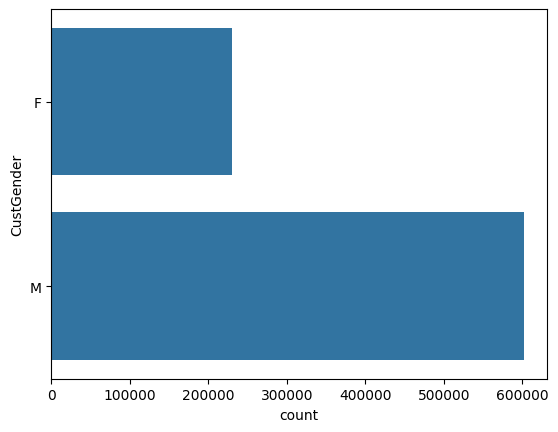

In [91]:
sns.countplot(df['CustGender'])

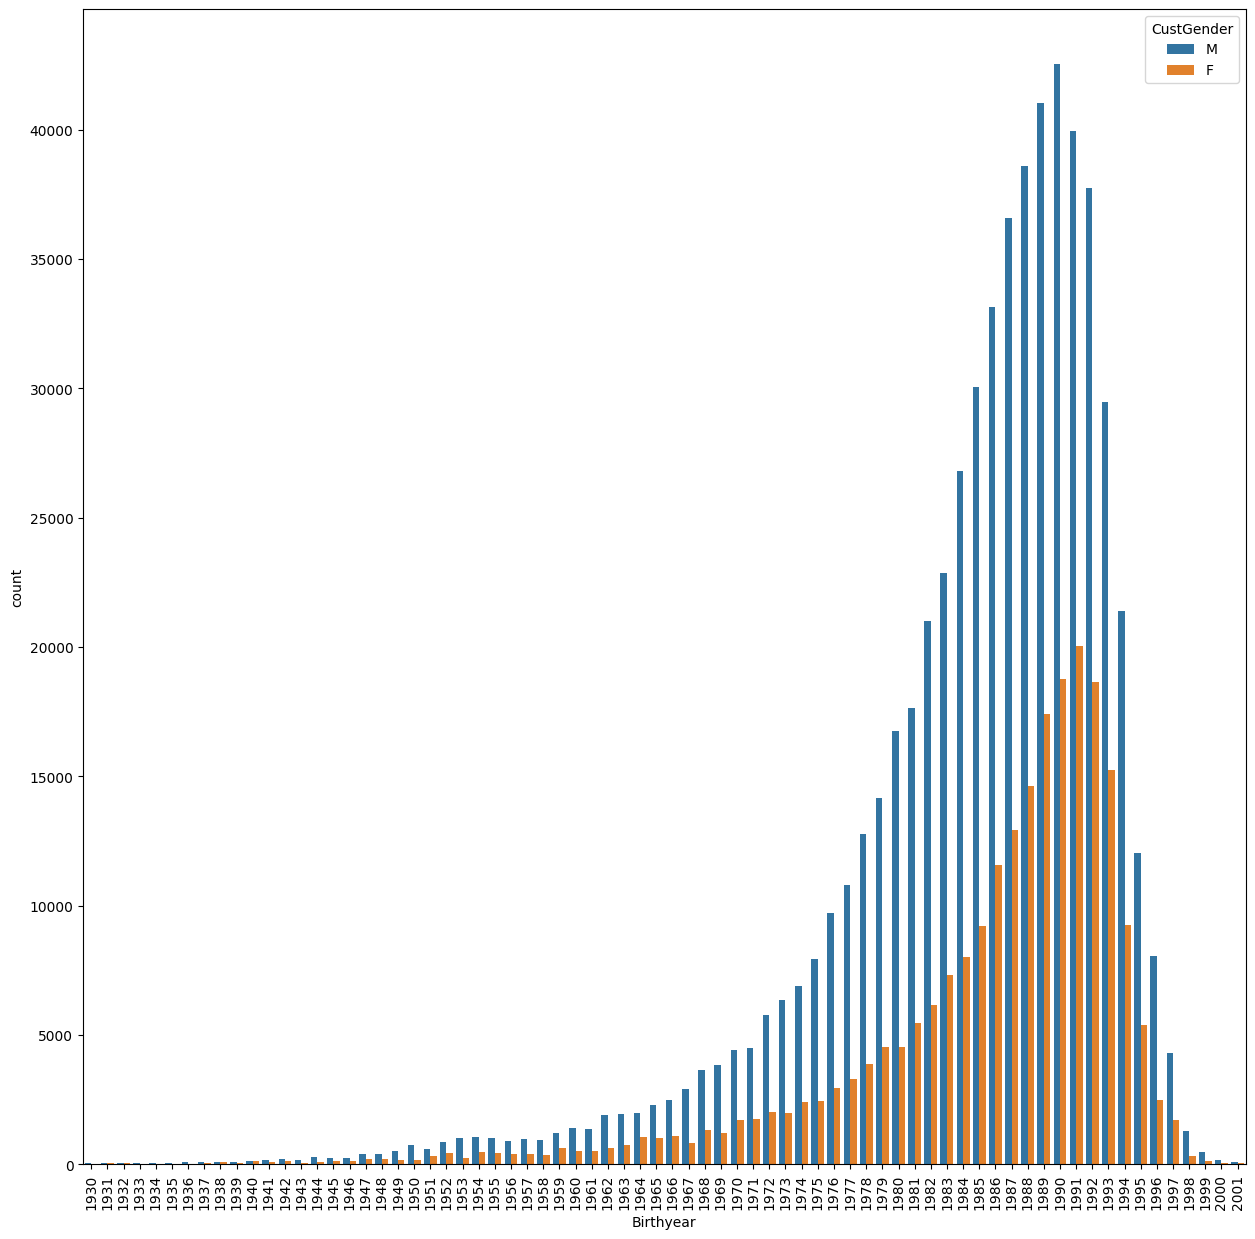

In [92]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Birthyear'],hue = df['CustGender'])
plt.xticks(rotation = 'vertical')
plt.show()

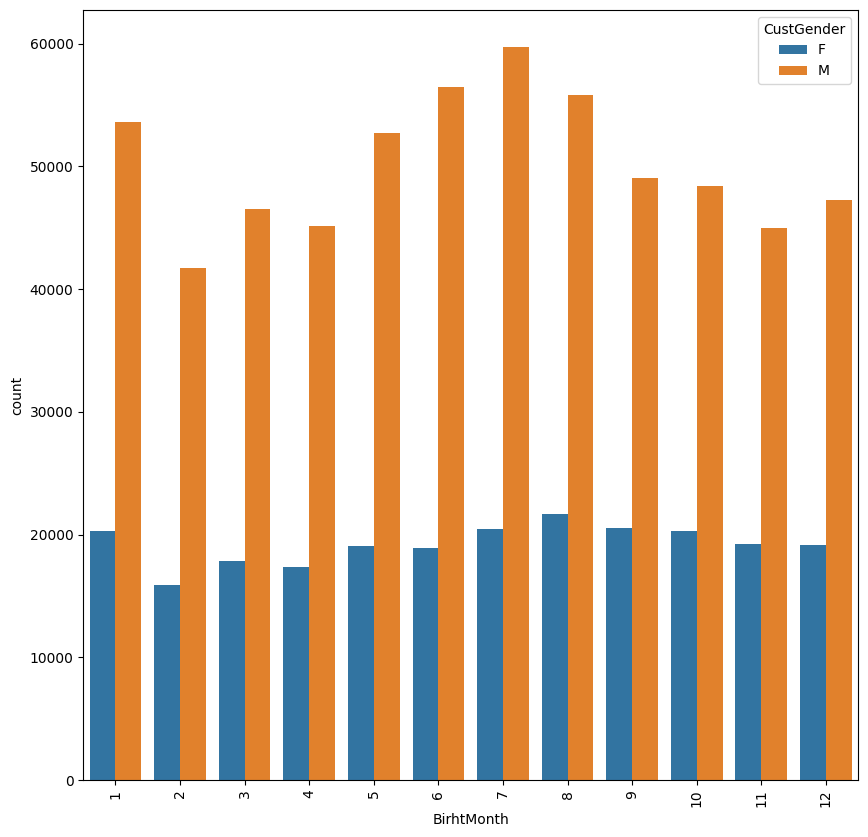

In [93]:

plt.figure(figsize = (10,10))
sns.countplot(x = df['BirhtMonth'],hue = df['CustGender'])
plt.xticks(rotation = 'vertical')
plt.show()

In [94]:
df

,index,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birthyear,Age,TransactionMonth,TransactionDay,BirhtMonth,BirhtDay,BirhtYear
0,0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,1994,22.583333,8,2,1,10,1994
1,1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,1957,59.333333,8,2,4,4,1957
2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,1996,19.750000,8,2,11,26,1996
3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,1973,42.916667,8,2,9,14,1973
4,4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,1988,28.416667,8,2,3,24,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884260,1048560,T1048561,C5028150,1980-05-24,M,PUNE,464.87,2016-09-18,184632,3000.0,1980,36.333333,9,18,5,24,1980
884261,1048561,T1048562,C1034220,1992-11-19,M,BANGALORE,1212.70,2016-09-18,184734,1500.0,1992,23.833333,9,18,11,19,1992
884262,1048562,T1048563,C8020229,1990-04-08,M,DELHI,7635.19,2016-09-18,184824,799.0,1990,26.416667,9,18,4,8,1990
884263,1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,1992,24.583333,9,18,2,20,1992


In [95]:
x = df.drop(columns = ['TransactionID','CustomerDOB','TransactionTime','TransactionDay','Birthyear','index'],axis = 1)

In [96]:
x

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age,TransactionMonth,BirhtMonth,BirhtDay,BirhtYear
0,C5841053,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.583333,8,1,10,1994
1,C2142763,M,JHAJJAR,2270.69,2016-08-02,27999.0,59.333333,8,4,4,1957
2,C4417068,F,MUMBAI,17874.44,2016-08-02,459.0,19.750000,8,11,26,1996
3,C5342380,F,MUMBAI,866503.21,2016-08-02,2060.0,42.916667,8,9,14,1973
4,C9031234,F,MUMBAI,6714.43,2016-08-02,1762.5,28.416667,8,3,24,1988
...,...,...,...,...,...,...,...,...,...,...,...
884260,C5028150,M,PUNE,464.87,2016-09-18,3000.0,36.333333,9,5,24,1980
884261,C1034220,M,BANGALORE,1212.70,2016-09-18,1500.0,23.833333,9,11,19,1992
884262,C8020229,M,DELHI,7635.19,2016-09-18,799.0,26.416667,9,4,8,1990
884263,C6459278,M,NASHIK,27311.42,2016-09-18,460.0,24.583333,9,2,20,1992


In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
ss = StandardScaler()
mm = MinMaxScaler()

In [99]:
x[['CustAccountBalance','Age','TransactionAmount (INR)',]] = ss.fit_transform(df[['CustAccountBalance','Age','TransactionAmount (INR)']])

In [100]:
x[['TransactionMonth','BirhtMonth','BirhtDay','BirhtYear']] = mm.fit_transform(df[['TransactionMonth','BirhtMonth','BirhtDay','BirhtYear']])

In [101]:
x

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age,TransactionMonth,BirhtMonth,BirhtDay,BirhtYear
0,C5841053,F,JAMSHEDPUR,-0.110630,2016-08-02,-0.228198,-0.987001,0.0,0.000000,0.300000,0.901408
1,C2142763,M,JHAJJAR,-0.130370,2016-08-02,4.232159,3.229011,0.0,0.272727,0.100000,0.380282
2,C4417068,F,MUMBAI,-0.110560,2016-08-02,-0.158999,-1.312045,0.0,0.909091,0.833333,0.929577
3,C5342380,F,MUMBAI,0.966832,2016-08-02,0.096275,1.345668,0.0,0.727273,0.433333,0.605634
4,C9031234,F,MUMBAI,-0.124728,2016-08-02,0.048840,-0.317793,0.0,0.181818,0.766667,0.816901
...,...,...,...,...,...,...,...,...,...,...,...
884260,C5028150,M,PUNE,-0.132663,2016-09-18,0.246155,0.590418,0.5,0.363636,0.766667,0.704225
884261,C1034220,M,BANGALORE,-0.131713,2016-09-18,0.006985,-0.843599,0.5,0.909091,0.600000,0.873239
884262,C8020229,M,DELHI,-0.123559,2016-09-18,-0.104787,-0.547236,0.5,0.272727,0.233333,0.845070
884263,C6459278,M,NASHIK,-0.098579,2016-09-18,-0.158839,-0.757558,0.5,0.090909,0.633333,0.873239


In [102]:
# x.to_csv('/content/x.csv')

In [103]:
top_15 = x['CustLocation'].value_counts().head(15).index

In [104]:
x['CustLocation'] = x['CustLocation'].apply(lambda x: x if x in top_15 else 'others')

In [105]:
x

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age,TransactionMonth,BirhtMonth,BirhtDay,BirhtYear
0,C5841053,F,others,-0.110630,2016-08-02,-0.228198,-0.987001,0.0,0.000000,0.300000,0.901408
1,C2142763,M,others,-0.130370,2016-08-02,4.232159,3.229011,0.0,0.272727,0.100000,0.380282
2,C4417068,F,MUMBAI,-0.110560,2016-08-02,-0.158999,-1.312045,0.0,0.909091,0.833333,0.929577
3,C5342380,F,MUMBAI,0.966832,2016-08-02,0.096275,1.345668,0.0,0.727273,0.433333,0.605634
4,C9031234,F,MUMBAI,-0.124728,2016-08-02,0.048840,-0.317793,0.0,0.181818,0.766667,0.816901
...,...,...,...,...,...,...,...,...,...,...,...
884260,C5028150,M,PUNE,-0.132663,2016-09-18,0.246155,0.590418,0.5,0.363636,0.766667,0.704225
884261,C1034220,M,BANGALORE,-0.131713,2016-09-18,0.006985,-0.843599,0.5,0.909091,0.600000,0.873239
884262,C8020229,M,DELHI,-0.123559,2016-09-18,-0.104787,-0.547236,0.5,0.272727,0.233333,0.845070
884263,C6459278,M,others,-0.098579,2016-09-18,-0.158839,-0.757558,0.5,0.090909,0.633333,0.873239


In [106]:
# we need to define the maximum an minimum value of recency and monetary. in our case the frequency is one hence we either give it avalue of 1 or do not give a value at all.

In [107]:
sorted(x['TransactionDate'].unique())

[Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-08-02 00:00:00'),
 Timestamp('2016-08-03 00:00:00'),
 Timestamp('2016-08-04 00:00:00'),
 Timestamp('2016-08-05 00:00:00'),
 Timestamp('2016-08-06 00:00:00'),
 Timestamp('2016-08-07 00:00:00'),
 Timestamp('2016-08-08 00:00:00'),
 Timestamp('2016-08-09 00:00:00'),
 Timestamp('2016-08-10 00:00:00'),
 Timestamp('2016-08-11 00:00:00'),
 Timestamp('2016-08-12 00:00:00'),
 Timestamp('2016-08-13 00:00:00'),
 Timestamp('2016-08-14 00:00:00'),
 Timestamp('2016-08-15 00:00:00'),
 Timestamp('2016-08-16 00:00:00'),
 Timestamp('2016-08-17 00:00:00'),
 Timestamp('2016-08-18 00:00:00'),
 Timestamp('2016-08-19 00:00:00'),
 Timestamp('2016-08-20 00:00:00'),
 Timestamp('2016-08-21 00:00:00'),
 Timestamp('2016-08-22 00:00:00'),
 Timestamp('2016-08-23 00:00:00'),
 Timestamp('2016-08-24 00:00:00'),
 Timestamp('2016-08-25 00:00:00'),
 Timestamp('2016-08-26 00:00:00'),
 Timestamp('2016-08-27 00:00:00'),
 Timestamp('2016-08-28 00:00:00'),
 Timestamp('2016-08-

In [108]:
# Creating a recency Table
df_recency = pd.DataFrame(x.groupby('CustomerID')['TransactionDate'].max())
recent_date = df_recency['TransactionDate'].max()
df_recency['Recency'] = df_recency['TransactionDate'].apply(lambda y: (recent_date - y).days)
df_recency

,TransactionDate,Recency
CustomerID,,
C1010011,2016-09-26,25
C1010012,2016-08-14,68
C1010014,2016-08-01,81
C1010018,2016-09-15,36
C1010024,2016-08-18,64
...,...,...
C9099836,2016-08-07,75
C9099877,2016-09-15,36
C9099919,2016-08-18,64


In [109]:
# for index, row in df_recency.iterrow():
#     if 0 < row['Recency'] <= 16:
#         df.at[index,'recency_score'] = 5
#     elif 17 < row['Recency'] <= 32:
#         df.at[index,'recency_score'] = 4
#     elif 33 < row['Recency'] <= 48:
#         df.at[index,'recency_score'] = 3
#     elif 49 < row['Recency'] <= 64:
#         df.at[index,'recency_score'] = 2
#     else:
#         df.at[index,'recency_score'] = 1

In [110]:
bins = [-1, 16, 32, 48, 64, float('inf')]
labels = [5, 4, 3, 2, 1]

# Assign Recency Scores
df_recency['recency_score'] = pd.cut(df_recency['Recency'], bins=bins, labels=labels, right=True)

In [111]:
df_recency

,TransactionDate,Recency,recency_score
CustomerID,,,
C1010011,2016-09-26,25,4
C1010012,2016-08-14,68,1
C1010014,2016-08-01,81,1
C1010018,2016-09-15,36,3
C1010024,2016-08-18,64,2
...,...,...,...
C9099836,2016-08-07,75,1
C9099877,2016-09-15,36,3
C9099919,2016-08-18,64,2


In [112]:
df_frequency = pd.DataFrame(x.groupby('CustomerID')['TransactionDate'].count())
df_frequency

,TransactionDate
CustomerID,
C1010011,1
C1010012,1
C1010014,1
C1010018,1
C1010024,1
...,...
C9099836,1
C9099877,1
C9099919,1


In [113]:
monetary_df = df.groupby(by='CustomerID', as_index=False)['TransactionAmount (INR)'].sum()
monetary_df

,CustomerID,TransactionAmount (INR)
0,C1010011,4750.0
1,C1010012,1499.0
2,C1010014,1205.0
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
832399,C9099836,691.0
832400,C9099877,222.0
832401,C9099919,126.0
832402,C9099941,50.0


In [114]:
monetary_df['TransactionAmount (INR)'].min()

0.0

In [115]:
monetary_df['TransactionAmount (INR)'].max()

1560034.99

In [116]:
bins = [-1, 3000, 6000, 8000, 10000, float('inf')]
labels = [1,2,3,4,5]

monetary_df['monetory_score'] = pd.cut(monetary_df['TransactionAmount (INR)'], bins=bins, labels=labels, right=True)

In [117]:
monetary_df

,CustomerID,TransactionAmount (INR),monetory_score
0,C1010011,4750.0,2
1,C1010012,1499.0,1
2,C1010014,1205.0,1
3,C1010018,30.0,1
4,C1010024,5000.0,2
...,...,...,...
832399,C9099836,691.0,1
832400,C9099877,222.0,1
832401,C9099919,126.0,1
832402,C9099941,50.0,1


In [118]:
rfm_df = df_recency.merge(df_frequency, on = 'CustomerID',how = 'inner').merge(monetary_df,on='CustomerID',how = 'inner')

In [119]:
rfm_df.head(1)

,CustomerID,TransactionDate_x,Recency,recency_score,TransactionDate_y,TransactionAmount (INR),monetory_score
0,C1010011,2016-09-26,25,4,1,4750.0,2


In [120]:
# rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=True)
# rfm_df['F_rank'] = rfm_df['TransactionDate_y'].rank(ascending=False)
# rfm_df['M_rank'] = rfm_df['TransactionAmount (INR)'].rank(ascending=False)

In [121]:
rfm_df['rfm_score'] = rfm_df['recency_score'].astype('str') + rfm_df['TransactionDate_y'].astype('str') + rfm_df['monetory_score'].astype('str')

In [122]:
rfm_df

,CustomerID,TransactionDate_x,Recency,recency_score,TransactionDate_y,TransactionAmount (INR),monetory_score,rfm_score
0,C1010011,2016-09-26,25,4,1,4750.0,2,412
1,C1010012,2016-08-14,68,1,1,1499.0,1,111
2,C1010014,2016-08-01,81,1,1,1205.0,1,111
3,C1010018,2016-09-15,36,3,1,30.0,1,311
4,C1010024,2016-08-18,64,2,1,5000.0,2,212
...,...,...,...,...,...,...,...,...
832399,C9099836,2016-08-07,75,1,1,691.0,1,111
832400,C9099877,2016-09-15,36,3,1,222.0,1,311
832401,C9099919,2016-08-18,64,2,1,126.0,1,211
832402,C9099941,2016-08-28,54,2,1,50.0,1,211


In [123]:
rfm_df.isna().sum()

CustomerID                 0
TransactionDate_x          0
Recency                    0
recency_score              0
TransactionDate_y          0
TransactionAmount (INR)    0
monetory_score             0
rfm_score                  0
dtype: int64

In [124]:
rfm_df['rfm_score'].value_counts()

rfm_score
111    303967
211    221125
311    196222
411     34136
112     17532
312     11268
212     11231
115      7056
215      4725
315      4281
113      3726
511      3058
313      2513
213      2468
114      2396
412      1814
214      1672
314      1503
415       706
413       409
414       269
512       167
515        99
513        38
514        23
Name: count, dtype: int64

In [125]:
# rfm_df['RFM_Score'] = 0.35*rfm_df['R_rank_norm'] + 0.65*rfm_df['M_rank_norm']
# rfm_df['RFM_Score'] *= 0.01
# rfm_df = rfm_df.round(2)
# rfm_score_df = rfm_df[['CustomerID', 'RFM_Score']]

In [126]:
rfm_df

,CustomerID,TransactionDate_x,Recency,recency_score,TransactionDate_y,TransactionAmount (INR),monetory_score,rfm_score
0,C1010011,2016-09-26,25,4,1,4750.0,2,412
1,C1010012,2016-08-14,68,1,1,1499.0,1,111
2,C1010014,2016-08-01,81,1,1,1205.0,1,111
3,C1010018,2016-09-15,36,3,1,30.0,1,311
4,C1010024,2016-08-18,64,2,1,5000.0,2,212
...,...,...,...,...,...,...,...,...
832399,C9099836,2016-08-07,75,1,1,691.0,1,111
832400,C9099877,2016-09-15,36,3,1,222.0,1,311
832401,C9099919,2016-08-18,64,2,1,126.0,1,211
832402,C9099941,2016-08-28,54,2,1,50.0,1,211


In [127]:
x_transaformed = pd.get_dummies(x,dtype = int,columns = ['CustLocation','CustGender'],drop_first = True)

In [128]:
x_transaformed = x_transaformed.drop(columns = ['CustomerID'],axis =1)

In [129]:
x_transaformed = x_transaformed.drop(columns = ['TransactionDate'],axis =1)

In [130]:
x_transaformed

,CustAccountBalance,TransactionAmount (INR),Age,TransactionMonth,BirhtMonth,BirhtDay,BirhtYear,CustLocation_BANGALORE,CustLocation_CHANDIGARH,CustLocation_CHENNAI,...,CustLocation_GURGAON,CustLocation_HYDERABAD,CustLocation_JAIPUR,CustLocation_KOLKATA,CustLocation_MUMBAI,CustLocation_NOIDA,CustLocation_PUNE,CustLocation_THANE,CustLocation_others,CustGender_M
0,-0.110630,-0.228198,-0.987001,0.0,0.000000,0.300000,0.901408,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.130370,4.232159,3.229011,0.0,0.272727,0.100000,0.380282,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.110560,-0.158999,-1.312045,0.0,0.909091,0.833333,0.929577,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.966832,0.096275,1.345668,0.0,0.727273,0.433333,0.605634,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.124728,0.048840,-0.317793,0.0,0.181818,0.766667,0.816901,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884260,-0.132663,0.246155,0.590418,0.5,0.363636,0.766667,0.704225,0,0,0,...,0,0,0,0,0,0,1,0,0,1
884261,-0.131713,0.006985,-0.843599,0.5,0.909091,0.600000,0.873239,1,0,0,...,0,0,0,0,0,0,0,0,0,1
884262,-0.123559,-0.104787,-0.547236,0.5,0.272727,0.233333,0.845070,0,0,0,...,0,0,0,0,0,0,0,0,0,1
884263,-0.098579,-0.158839,-0.757558,0.5,0.090909,0.633333,0.873239,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [131]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
x_selection = sel.fit_transform(x_transaformed.iloc[:,0:7])
x_selection

array([[-0.11063022, -0.22819849, -0.9870012 ,  0.        ,  0.        ,
         0.3       ],
       [-0.13036991,  4.2321593 ,  3.22901092,  0.        ,  0.27272727,
         0.1       ],
       [-0.1105599 , -0.15899869, -1.31204522,  0.        ,  0.90909091,
         0.83333333],
       ...,
       [-0.12355932, -0.10478686, -0.54723576,  0.5       ,  0.27272727,
         0.23333333],
       [-0.09857901, -0.15883924, -0.75755836,  0.5       ,  0.09090909,
         0.63333333],
       [-0.12040739, -0.0727381 ,  0.79118078,  0.5       ,  0.63636364,
         0.96666667]])

In [132]:
sel.get_feature_names_out()

array(['CustAccountBalance', 'TransactionAmount (INR)', 'Age',
       'TransactionMonth', 'BirhtMonth', 'BirhtDay'], dtype=object)

In [133]:
sel.get_feature_names_out()

array(['CustAccountBalance', 'TransactionAmount (INR)', 'Age',
       'TransactionMonth', 'BirhtMonth', 'BirhtDay'], dtype=object)

In [134]:
from sklearn.feature_selection import chi2

<Axes: >

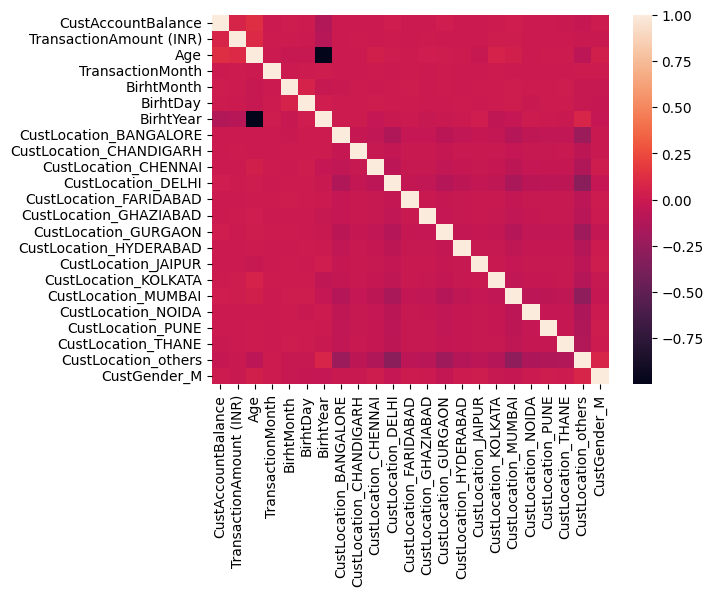

In [135]:
sns.heatmap(x_transaformed.corr())

In [136]:
x_1 = x_transaformed[['CustAccountBalance', 'TransactionAmount (INR)', 'Age',
       'TransactionMonth', 'BirhtMonth', 'BirhtDay',
       'CustLocation_BANGALORE', 'CustLocation_DELHI',
       'CustLocation_GURGAON', 'CustLocation_MUMBAI',
       'CustLocation_others', 'CustGender_M']]

In [137]:
x_1

,CustAccountBalance,TransactionAmount (INR),Age,TransactionMonth,BirhtMonth,BirhtDay,CustLocation_BANGALORE,CustLocation_DELHI,CustLocation_GURGAON,CustLocation_MUMBAI,CustLocation_others,CustGender_M
0,-0.110630,-0.228198,-0.987001,0.0,0.000000,0.300000,0,0,0,0,1,0
1,-0.130370,4.232159,3.229011,0.0,0.272727,0.100000,0,0,0,0,1,1
2,-0.110560,-0.158999,-1.312045,0.0,0.909091,0.833333,0,0,0,1,0,0
3,0.966832,0.096275,1.345668,0.0,0.727273,0.433333,0,0,0,1,0,0
4,-0.124728,0.048840,-0.317793,0.0,0.181818,0.766667,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884260,-0.132663,0.246155,0.590418,0.5,0.363636,0.766667,0,0,0,0,0,1
884261,-0.131713,0.006985,-0.843599,0.5,0.909091,0.600000,1,0,0,0,0,1
884262,-0.123559,-0.104787,-0.547236,0.5,0.272727,0.233333,0,1,0,0,0,1
884263,-0.098579,-0.158839,-0.757558,0.5,0.090909,0.633333,0,0,0,0,1,1


# Apllying K Means Clustering on Complete x_1

In [138]:
from sklearn.cluster import KMeans

In [139]:
km = KMeans()

In [140]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,12):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(x_1)
    sse.append(km.inertia_)

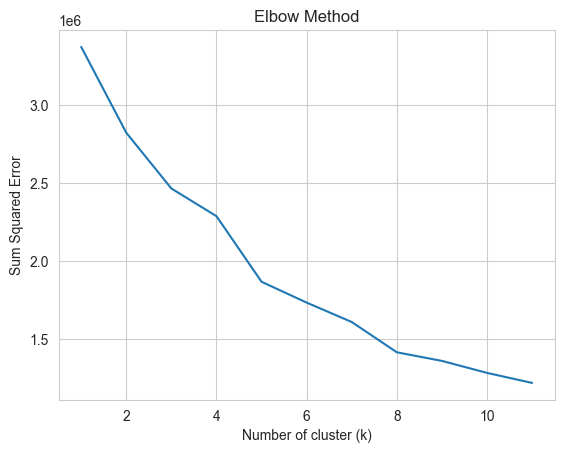

In [141]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,12), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [142]:
sse

[3372810.818619305,
 2822256.1886746855,
 2464541.3377273106,
 2286946.0012094486,
 1866101.403879126,
 1732548.3272673865,
 1608045.6975503408,
 1413766.876663601,
 1358559.7226721256,
 1281587.6734849145,
 1217285.1167294735]

In [143]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [145]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,12):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(x_1)
    sse.append(km.inertia_)

# Applying K Means on X_1 After selecting 4 most important Features using PCA

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components = 4)

In [148]:
b = pca.fit_transform(x_1)

In [149]:
pca.explained_variance_ratio_

array([0.29514327, 0.23132717, 0.2144989 , 0.06528125])

In [150]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3'], dtype=object)

In [151]:
km1 = KMeans()

In [152]:
sse1 = [] #SUM OF SQUARED ERROR
for k in range(1,12):
    km1 = KMeans(n_clusters=k, random_state=2)
    km1.fit(b)
    sse1.append(km1.inertia_)

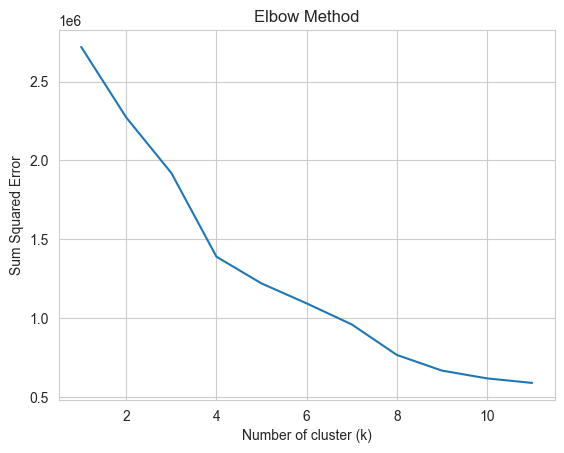

In [153]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,12), y=sse1)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [154]:
sse1

[2719330.6984766964,
 2272064.4117428195,
 1920399.6381948008,
 1390320.522280633,
 1221021.6542872365,
 1094721.7891980316,
 961480.1552751762,
 768168.421886926,
 668928.149423879,
 619617.2116573451,
 590876.5121531275]

# Applying K Means on RFM Score Alone

In [155]:
ss_1 = MinMaxScaler()

In [156]:
rfm_df['rfm_score'] = ss_1.fit_transform(rfm_df['rfm_score'].values.reshape(-1,1))

In [157]:
km_2 = KMeans()

In [158]:
sse2 = [] #SUM OF SQUARED ERROR
for k in range(1,12):
    km2 = KMeans(n_clusters=k, random_state=2)
    km2.fit(rfm_df['rfm_score'].values.reshape(-1,1))
    sse2.append(km2.inertia_)

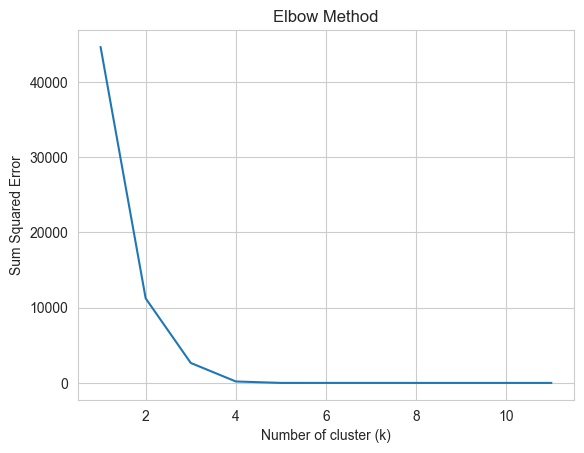

In [159]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,12), y=sse2)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [160]:
sse2

[44656.8335460169,
 11240.957595852218,
 2654.608922433443,
 192.61329773939445,
 2.30273128525832,
 1.5094240704845443,
 0.9849087251487335,
 0.4838654992509142,
 0.3511890826300507,
 0.26598818627377546,
 0.2598126529444359]

In [161]:
# The optimum value seems to be 4 hence we run the node again but with 3 clusters

In [162]:
km_rfm = KMeans(n_clusters = 3)

In [163]:
km_rfm.fit(rfm_df['rfm_score'].values.reshape(-1,1))

KMeans(n_clusters=3)

In [164]:
km_rfm.inertia_

2654.608922433443

In [165]:
rfm_clusters = km_rfm.predict(rfm_df['rfm_score'].values.reshape(-1,1))

In [166]:
rfm_clusters

array([0, 1, 1, ..., 2, 2, 0])

In [167]:
rfm_df['Cluster'] =  rfm_clusters

In [168]:
rfm_df

,CustomerID,TransactionDate_x,Recency,recency_score,TransactionDate_y,TransactionAmount (INR),monetory_score,rfm_score,Cluster
0,C1010011,2016-09-26,25,4,1,4750.0,2,0.745050,0
1,C1010012,2016-08-14,68,1,1,1499.0,1,0.000000,1
2,C1010014,2016-08-01,81,1,1,1205.0,1,0.000000,1
3,C1010018,2016-09-15,36,3,1,30.0,1,0.495050,0
4,C1010024,2016-08-18,64,2,1,5000.0,2,0.250000,2
...,...,...,...,...,...,...,...,...,...
832399,C9099836,2016-08-07,75,1,1,691.0,1,0.000000,1
832400,C9099877,2016-09-15,36,3,1,222.0,1,0.495050,0
832401,C9099919,2016-08-18,64,2,1,126.0,1,0.247525,2
832402,C9099941,2016-08-28,54,2,1,50.0,1,0.247525,2


In [169]:
np.array(sorted(rfm_df[rfm_df['Cluster'] == 2]['rfm_score'].unique()))

array([0.24752475, 0.25      , 0.25247525, 0.2549505 , 0.25742574])

In [170]:
np.array(sorted(rfm_df[rfm_df['Cluster'] == 1]['rfm_score'].unique()))

array([0.        , 0.00247525, 0.0049505 , 0.00742574, 0.00990099])

In [171]:
np.array(sorted(rfm_df[rfm_df['Cluster'] == 0]['rfm_score'].unique()))

array([0.4950495 , 0.49752475, 0.5       , 0.50247525, 0.5049505 ,
       0.74257426, 0.7450495 , 0.74752475, 0.75      , 0.75247525,
       0.99009901, 0.99257426, 0.9950495 , 0.99752475, 1.        ])

In [172]:
np.array(sorted(rfm_df[rfm_df['Cluster'] == 2]['rfm_score'].unique()))

array([0.24752475, 0.25      , 0.25247525, 0.2549505 , 0.25742574])

In [173]:
rfm_df['Cluster'].value_counts()

Cluster
1    334677
0    256506
2    241221
Name: count, dtype: int64

In [174]:
# Calculating weighted average rfm_score

In [175]:
rfm_df['weigthed_average'] = round((rfm_df['recency_score'].astype('int32')*0.4 + rfm_df['TransactionDate_y']*0.1 + rfm_df['monetory_score'].astype('int32')*0.5),2)

In [176]:
km_4 = KMeans()

In [177]:
sse3 = [] #SUM OF SQUARED ERROR
for k in range(1,12):
    km4 = KMeans(n_clusters=k, random_state=2)
    km4.fit(rfm_df['weigthed_average'].values.reshape(-1,1))
    sse3.append(km4.inertia_)

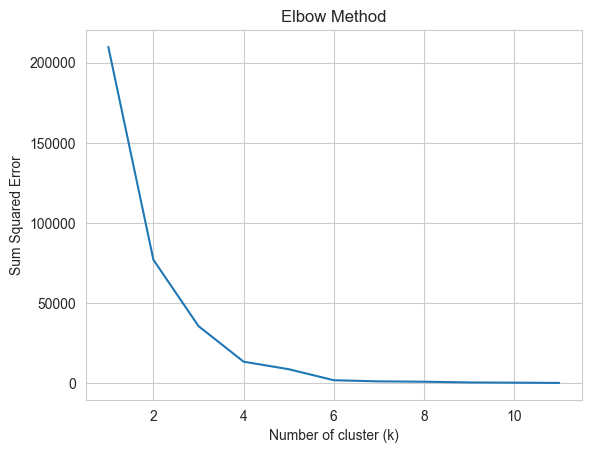

In [178]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,12), y=sse3)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [179]:
sse3

[209840.9353382754,
 77126.60684700473,
 35780.13943798245,
 13596.706384711655,
 8908.064273314514,
 2042.5974183313517,
 1321.7615281640446,
 1104.918380463671,
 654.8666204774354,
 518.5605352401413,
 356.1197310727502]